## **Exploratory Data Analysis (EDA)**

This notebook contains data cleaning, distribution plots, correlation analyses, and geospatial analysis.

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# For inline plots
%matplotlib inline

In [7]:
# Load Data

df = pd.read_csv('../data/phivolcs_earthquake_data.csv')
df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2016-01-01 00:40:00,17.34,120.30,023,3.0,015 km N 87° W of San Esteban (Ilocos Sur)
1,2016-01-01 05:06:00,14.65,123.12,017,3.3,054 km N 42° E of Paracale (Camarines Norte)
2,2016-01-01 13:24:00,09.76,125.46,012,2.4,005 km S 42° W of Surigao City
3,2016-01-01 15:01:00,17.30,120.27,026,2.9,018 km S 81° W of San Esteban (Ilocos Sur)
4,2016-01-01 20:27:00,08.89,126.28,024,3.0,004 km S 44° W of Cagwait (Surigao del Sur)


In [3]:
# Data Checks
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95564 entries, 0 to 95563
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date_Time_PH  95564 non-null  object 
 1   Latitude      95564 non-null  object 
 2   Longitude     95564 non-null  object 
 3   Depth_In_Km   95563 non-null  object 
 4   Magnitude     95564 non-null  float64
 5   Location      95564 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.4+ MB


,Magnitude
count,95564.000000
mean,2.546805
std,0.696405
min,1.000000
25%,2.100000
50%,2.400000
75%,2.900000
max,7.500000


### **Clean and Prepare Data**

In [8]:
import sys
sys.path.append('../src')

from data_processing import load_data, clean_data

df = load_data('../data/phivolcs_earthquake_data.csv')
df = clean_data(df)

df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Date_Time
0,2016-01-01 00:40:00,17.34,120.30,23.0,3.0,015 km N 87° W of San Esteban (Ilocos Sur),2016-01-01 00:40:00
1,2016-01-01 05:06:00,14.65,123.12,17.0,3.3,054 km N 42° E of Paracale (Camarines Norte),2016-01-01 05:06:00
2,2016-01-01 13:24:00,9.76,125.46,12.0,2.4,005 km S 42° W of Surigao City,2016-01-01 13:24:00
3,2016-01-01 15:01:00,17.30,120.27,26.0,2.9,018 km S 81° W of San Esteban (Ilocos Sur),2016-01-01 15:01:00
4,2016-01-01 20:27:00,8.89,126.28,24.0,3.0,004 km S 44° W of Cagwait (Surigao del Sur),2016-01-01 20:27:00


### **Distribution and Correlation of Magnitude and Earthquake Depths**

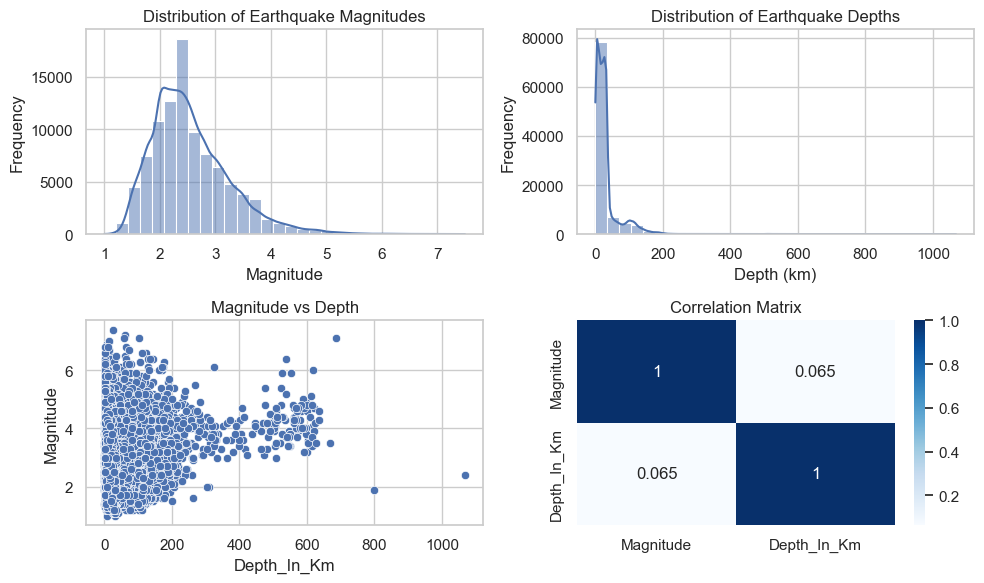

In [310]:
df['Depth_In_Km'] = pd.to_numeric(df['Depth_In_Km'], errors='coerce')
df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
titles = ['Distribution of Earthquake Magnitudes', 'Distribution of Earthquake Depths', 'Magnitude vs Depth', 'Correlation Matrix']
index  = ['Magnitude', 'Depth_In_Km']
xlabel = ['Magnitude', 'Depth (km)']

for i in range(2):
  sns.histplot(df[index[i]], kde=True, bins=30, ax=axes[0, i])
  axes[0, i].set_title(titles[i])
  axes[0, i].set_xlabel(xlabel[i])
  axes[0, i].set_ylabel('Frequency')

sns.scatterplot(x='Depth_In_Km', y='Magnitude', data=df, ax=axes[1,0])
axes[1,0].set_title(titles[2])

corr_matrix = df[['Magnitude','Depth_In_Km']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title(titles[3])

plt.tight_layout()
plt.show()

### **Load Administrative Regions in the Philippines from Shapefiles**

In [13]:
# Load Shapefiles
import os

shapefile_path = '../data/philippines_shapefile/ph.shp'

ph_shape = gpd.read_file(shapefile_path).to_crs(epsg=4326)
ph_shape = ph_shape.drop(columns=['source'])
ph_shape = ph_shape.rename(index=str, columns={'name' : 'region_name'})

print(ph_shape)
print(ph_shape.crs)

      id                           region_name  \
0   PH11                                 Davao   
1   PH13                                Caraga   
2   PH10                     Northern Mindanao   
3   PH14  Autonomous Region in Muslim Mindanao   
4   PH09                   Zamboanga Peninsula   
5   PH41                              Mimaropa   
6   PH40                            Calabarzon   
7   PH08                       Eastern Visayas   
8   PH05                                 Bicol   
9   PH03                         Central Luzon   
10  PH02                        Cagayan Valley   
11  PH00               National Capital Region   
12  PH15      Cordillera Administrative Region   
13  PH01                                Ilocos   
14  PH07                       Central Visayas   
15  PH06                       Western Visayas   
16  PH12                          Soccsksargen   

                                             geometry  
0   MULTIPOLYGON (((125.77687 6.89403, 125.

### **Spatial Distribution of Earthquake Epicenters**|

In [300]:
from matplotlib import cm, colors

def truncate_colormap(cmap, minval, maxval, n=256):
  new_cmap = colors.LinearSegmentedColormap.from_list(f"truncated({cmap.name},{minval},{maxval})", cmap(np.linspace(minval, maxval, n)))
  return new_cmap

truncated_cmap = truncate_colormap(cm.hot_r, minval=0.3, maxval=1)

                            region_name  quake_count
0  Autonomous Region in Muslim Mindanao          769
1                                 Bicol          876
2                        Cagayan Valley         1063
3                            Calabarzon         1451
4                                Caraga         4592


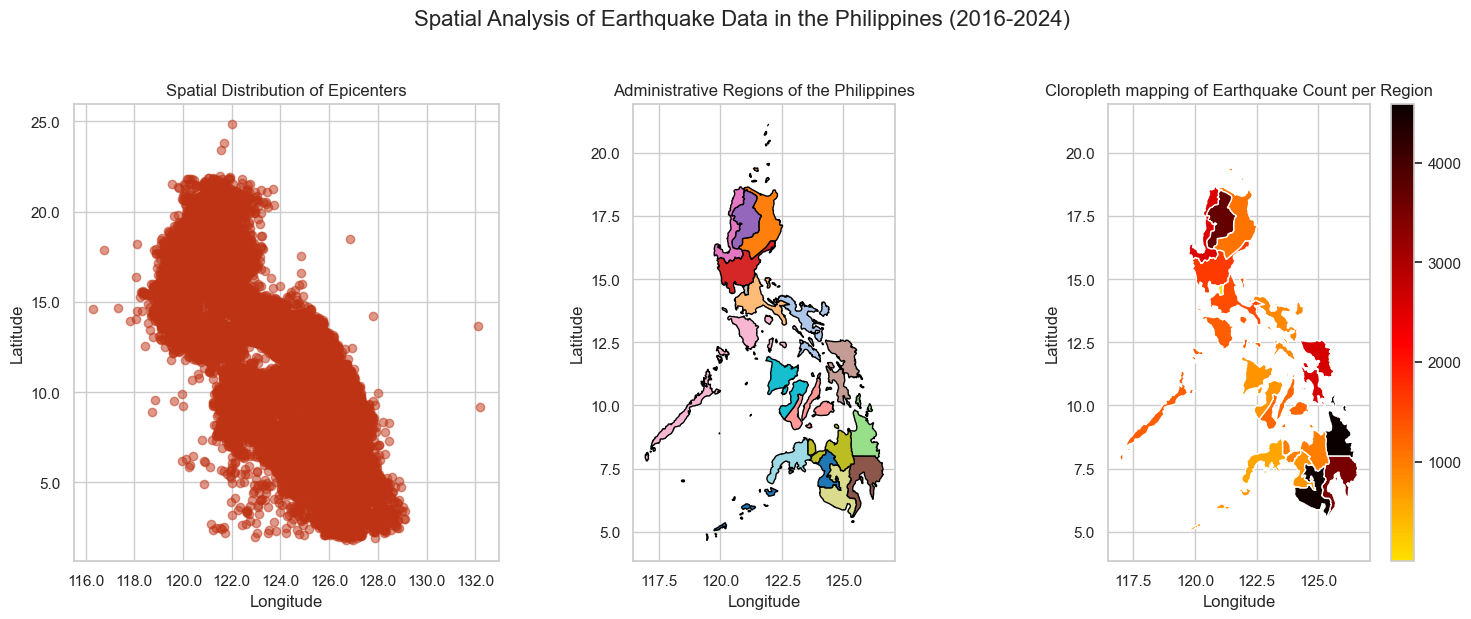

In [388]:
from matplotlib import ticker
from shapely.geometry import Point
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

filtered_df = df[(df['Longitude'] >= 100) & (df['Longitude'] <= 140)]
titles = ['Spatial Distribution of Epicenters', 'Administrative Regions of the Philippines', 'Cloropleth mapping of Earthquake Count per Region']

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf_quakes = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
gdf_joined = gpd.sjoin(gdf_quakes, ph_shape, how='left')
gdf_joined.dropna(subset=['region_name'], inplace=True)

quake_counts = gdf_joined.groupby('region_name').size().reset_index(name='quake_count')
print(quake_counts.head())

for i in range(3):
  if i == 0:
    axes[i].scatter(filtered_df['Longitude'], filtered_df['Latitude'], alpha=0.5/(4**i), c='#be3314')
  elif i == 1:
    ph_shape.plot(ax=axes[i], column='region_name', legend=i-1, cmap='tab20', edgecolor='black', legend_kwds={'bbox_to_anchor': (1.2, 1)})
  else: 
    ph_regions = ph_shape.merge(quake_counts, on='region_name', how='left')
    ph_regions.plot(column='quake_count', cmap=truncated_cmap, legend=True, figsize=(8,6), ax=axes[i])
    
  axes[i].set_xlabel('Longitude')
  axes[i].set_ylabel('Latitude')
  axes[i].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
  axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
  axes[i].set_title(titles[i])

fig.suptitle("Spatial Analysis of Earthquake Data in the Philippines (2016-2024)", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

#### **Time-Based Analysis**

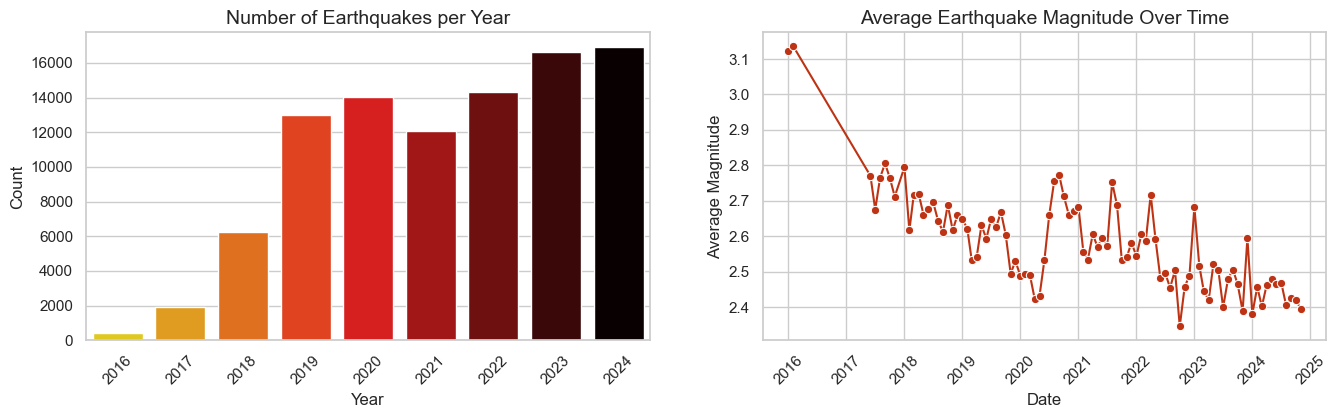

In [346]:
# Group earthquakes by year and by month
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month

yearly_counts = df.groupby('Year').size().reset_index(name='Count')
# Get the average magnitude by month
monthly_mag = df.groupby(['Year', 'Month'])['Magnitude'].mean().reset_index()
monthly_mag['date_index'] = pd.to_datetime(monthly_mag['Year'].astype(str) + '-' + monthly_mag['Month'].astype(str) + '-01')

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.barplot(data=yearly_counts, x='Year', y='Count', ax=axes[0], palette=truncated_cmap, hue='Year', legend=False)
axes[0].set_title("Number of Earthquakes per Year", fontsize=14)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=monthly_mag, x='date_index', y='Magnitude', ax=axes[1], marker='o', color='#be3314')
axes[1].set_title("Average Earthquake Magnitude Over Time", fontsize=14)
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Average Magnitude", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

#### **Depth Analysis**

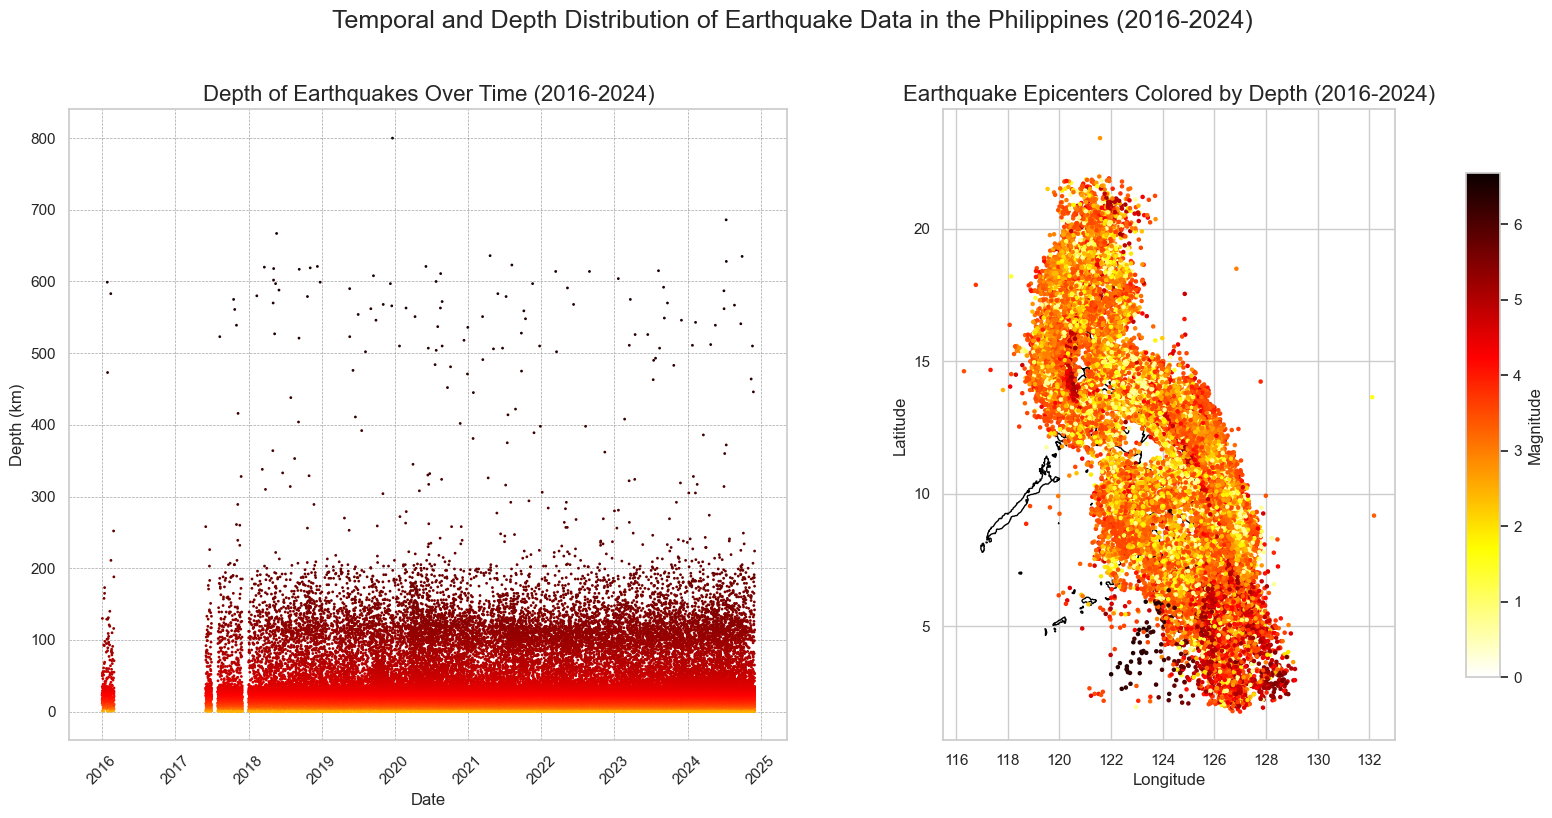

In [390]:
filtered_df = filtered_df.sort_values(by='Date_Time').copy()
filtered_depth = filtered_df[filtered_df['Depth_In_Km'] <= 800].copy()
filtered_depth['Log_Depth'] = np.log1p(filtered_depth['Depth_In_Km'])

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121)  
ax1.scatter( filtered_depth['Date_Time'],  filtered_depth['Depth_In_Km'], c= filtered_depth['Log_Depth'], cmap=truncated_cmap, s=1)
ax1.set_title("Depth of Earthquakes Over Time (2016-2024)", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Depth (km)", fontsize=12)
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(122)
ph_shape.plot(ax=ax2, color='white', edgecolor='black')
sc = ax2.scatter(filtered_depth['Longitude'], filtered_depth['Latitude'], c=filtered_depth['Log_Depth'], cmap='hot_r', s=5)
ax2.set_title("Earthquake Epicenters Colored by Depth (2016-2024)", fontsize=16)
ax2.set_xlabel("Longitude", fontsize=12)
ax2.set_ylabel("Latitude", fontsize=12)
cbar = fig.colorbar(sc, shrink=0.8, aspect=15, pad=0.1)
cbar.set_label("Magnitude", fontsize=12)

fig.suptitle("Temporal and Depth Distribution of Earthquake Data in the Philippines (2016-2024)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

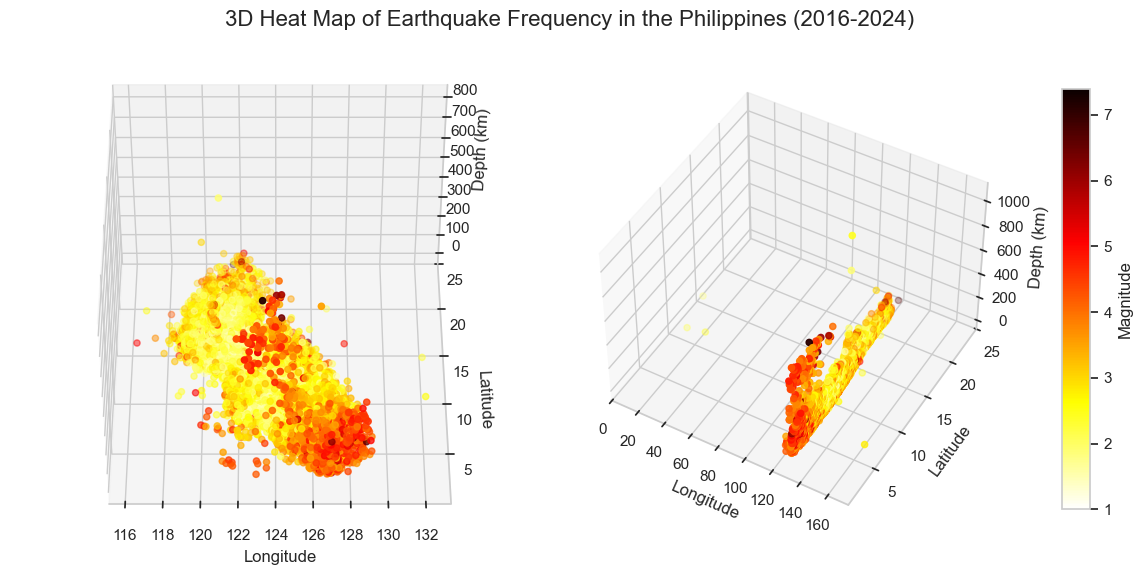

In [393]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(filtered_depth['Longitude'], filtered_depth['Latitude'], filtered_depth['Depth_In_Km'], c=filtered_depth['Magnitude'], cmap='hot_r')
ax1.view_init(45,270,0)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Depth (km)')

ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df['Longitude'], df['Latitude'], df['Depth_In_Km'], c=df['Magnitude'], cmap='hot_r')
ax2.view_init(45,300,0)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Depth (km)')

cbar = fig.colorbar(sc2, shrink=0.8, aspect=15, pad=0.1)
cbar.set_label("Magnitude", fontsize=12)

fig.suptitle("3D Heat Map of Earthquake Frequency in the Philippines (2016-2024)", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

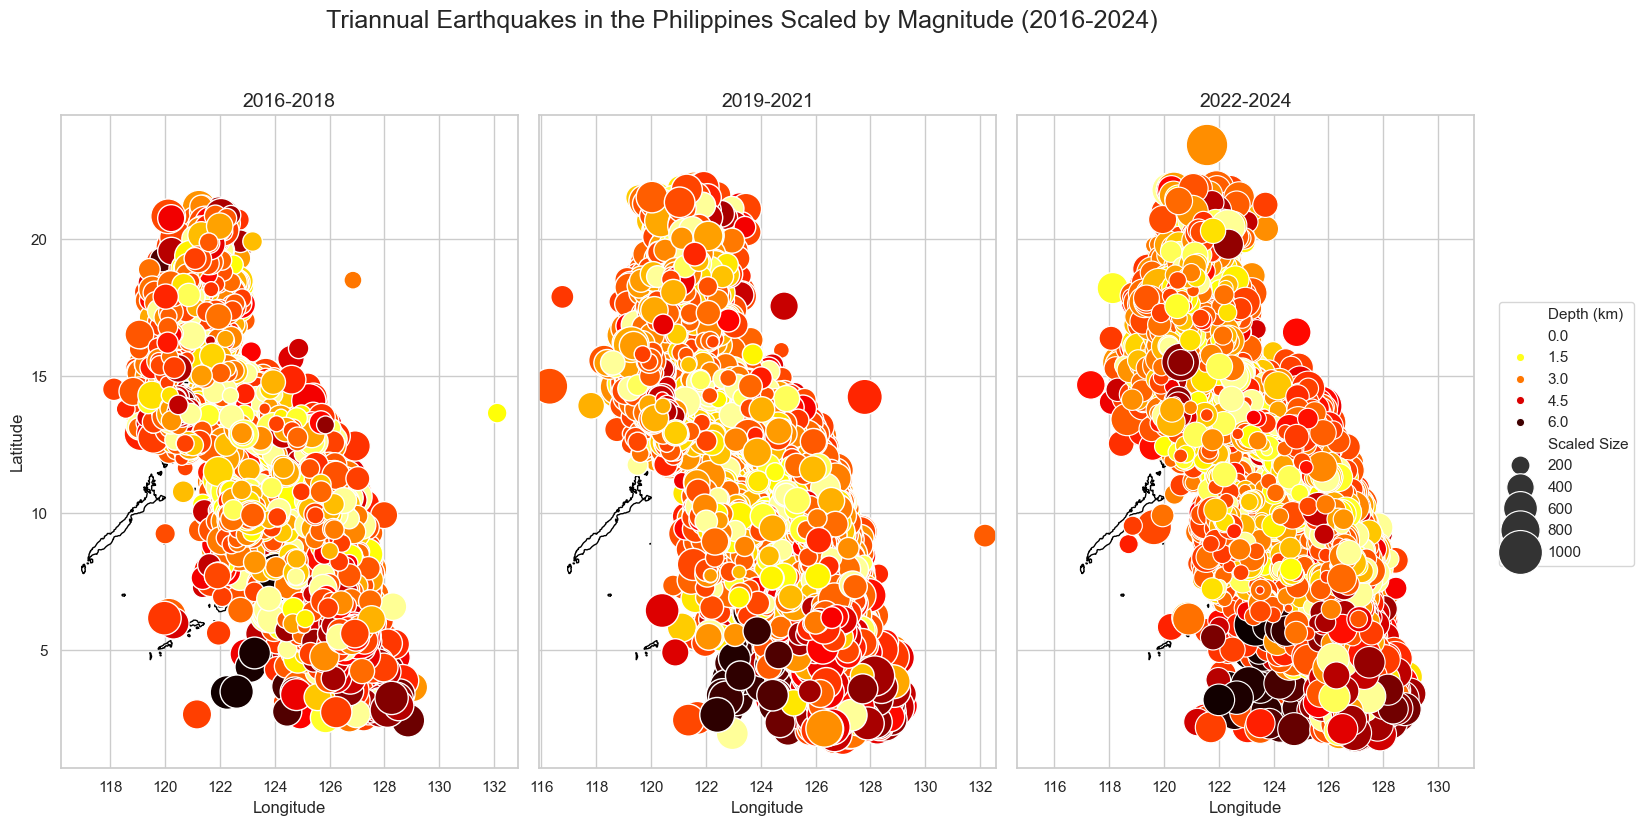

In [419]:
# filtered_depth['Size_Factor'] = (filtered_depth['Magnitude'] * filtered_depth['Depth_In_Km'] / filtered_depth['Depth_In_Km'].max())
filtered_depth['Size_Factor'] = filtered_depth['Magnitude'] / filtered_depth['Magnitude'].max()
min_size, max_size = 20, 1000
size_min = filtered_depth['Size_Factor'].min()
size_max = filtered_depth['Size_Factor'].max()

filtered_depth['Scaled_Size'] = ((filtered_depth['Size_Factor'] - size_min) / (size_max - size_min) * (max_size - min_size) + min_size)

fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
time_ranges = [(2016, 2018), (2019, 2021), (2022, 2024)]
titles = ["2016-2018", "2019-2021", "2022-2024"]

last_scatter = None
for i, (start_year, end_year) in enumerate(time_ranges):
  ax = axes[i]
  subset = filtered_depth[(filtered_depth['Date_Time'].dt.year >= start_year) & (filtered_depth['Date_Time'].dt.year <= end_year)]

  ph_shape.plot(ax=ax, color='white', edgecolor='black')

  scatter = sns.scatterplot(data=subset, x='Longitude', y='Latitude', size='Scaled_Size', hue='Log_Depth', 
    palette='hot_r', sizes=(min_size, max_size), ax=ax
  )

  ax.set_title(titles[i], fontsize=14)
  ax.set_xlabel("Longitude", fontsize=12)
  ax.set_ylabel("Latitude", fontsize=12)
  ax.set_aspect('equal', adjustable='datalim')
  ax.legend([], [], frameon=False)
  last_scatter = scatter

if last_scatter:
  handles, labels = last_scatter.get_legend_handles_labels()
  labels = [label.replace("Log_Depth", "Depth (km)").replace("Scaled_Size", "Scaled Size") for label in labels]
  fig.legend(handles=handles, labels=labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

fig.suptitle("Triannual Earthquakes in the Philippines Scaled by Magnitude (2016-2024)", fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.gca()
# Kernel Density Contours for quake locations
ph_shape.plot(ax=ax, color='white', edgecolor='black')
kde_plot = sns.kdeplot(data=filtered_depth, x='Longitude', y='Latitude', fill=True, levels=20, cmap=truncated_cmap, alpha=0.75)

norm = kde_plot.collections[-1].norm
cmap = kde_plot.collections[-1].cmap
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([]) 
cbar = plt.colorbar(mappable, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Density")

ax.set_title("Contour Map (Kernel Density) of Earthquake Epicenters (2016–2024)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()
